## <h2 style="text-align: center;"><b>PyTorch basics: syntax, torch.cuda and torch.autograd</b></h2>

<p style="align: center;"><img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png" width=400 height=100></p>

Hi! In this notebook we will cover the basics of the **PyTorch deep learning framework**. 

<h3 style="text-align: center;"><b>Intro</b></h3>

**Frameworks** are the specific code libraries with their own internal structure and pipelines.

There are many deep learning frameworks nowadays (02/2019). The difference between them is in the internal computation principles. For example, in **[Caffe](http://caffe.berkeleyvision.org/)** and **[Caffe2](https://caffe2.ai/)** you write the code using some "ready blocks" (just like the $LEGO^{TM}$ :). In **[TensorFlow](https://www.tensorflow.org/)** and **[Theano](http://deeplearning.net/software/theano/)** you declare the computation graph at first, then compile it and use it for inference/training (`tf.session()`). By the way, now TensorFlow (since v1.10) has the [Eager Execution](https://www.tensorflow.org/guide/eager), which can be handy for fast prototyping and debugging. **[Keras](https://keras.io/)** is a very popular and useful DL framework that allows to create networks fast and has many demanding features. 

<p style="align: center;"><img src="https://habrastorage.org/web/e3e/c3e/b78/e3ec3eb78d714a7993a6b922911c0866.png" width=500 height=500></p>  
<p style="text-align: center;"><i>Image credit: https://habr.com/post/334380/</i><p>

We will use PyTorch bacause it's been actively developed and supported by the community and [Facebook AI Research](https://research.fb.com/category/facebook-ai-research/).

<h3 style="text-align: center;"><b>Installation</b></h3>

The detailed instruction on how to install PyTorch you can find on the [official PyTorch website](https://pytorch.org/).

<h3 style="text-align: center;">Syntax<b></b></h3>

In [ ]:
import torch

Some facts about PyTorch:  
- dynamic computation graph
- handy `torch.nn` and `torchvision` modules for fast neural network prototyping
- even faster than TensorFlow on some tasks
- allows to use GPU easily

If PyTorch was a formula, it would be:  

$$PyTorch = NumPy + CUDA + Autograd$$

(CUDA - [wiki](https://en.wikipedia.org/wiki/CUDA))

Let's see how we can use PyTorch to operate with vectors and tensors.  

Recall that **a tensor** is a multidimensional vector, e.g. :  

`x = np.array([1,2,3])` -- a vector = a tensor with 1 dimension (to be more precise: `(1,)`)  
`y = np.array([[1, 2, 3], [4, 5, 6]])` -- a matrix = a tensor with 2 dimensions (`(2, 3)` in this case)  
`z = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]],  
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]],  
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]]])` -- "a cube" (3, 3, 3) = a tensor with 3 dimensions (`(3, 3, 3)` in this case)

One real example of 3-dimensional tensor is **an image**, it has 3 dimensions: `height`, `width` and the `channel depth` (= 3 for color images, 1 for a greyscale). You can think of it as of parallelepiped consisting of the real numbers.

In PyTorch we will use `torch.Tensor` (`FloatTensor`, `IntTensor`, `ByteTensor`) for all the computations.

All tensor types:

In [ ]:
torch.HalfTensor      # 16 bits, floating point
torch.FloatTensor     # 32 bits, floating point
torch.DoubleTensor    # 64 bits, floating point

torch.ShortTensor     # 16 bits, integer, signed
torch.IntTensor       # 32 bits, integer, signed
torch.LongTensor      # 64 bits, integer, signed

torch.CharTensor      # 8 bits, integer, signed
torch.ByteTensor      # 8 bits, integer, unsigned

torch.ByteTensor

We will use only `torch.FloatTensor()` and `torch.IntTensor()`. 

Let's begin to do something!

* Creating the tensor:

In [ ]:
a = torch.FloatTensor([1, 2])
a

tensor([1., 2.])

In [ ]:
a.shape

torch.Size([2])

In [ ]:
b = torch.FloatTensor([[1,2,3], [4,5,6]])
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
b.shape

torch.Size([2, 3])

In [ ]:
x = torch.FloatTensor(2,3,4)

In [ ]:
x

tensor([[[-2.0181e+20,  9.6549e-43,  8.9683e-44,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  1.5769e-19,  4.3202e-05,  1.7281e-04]],

        [[ 5.3596e-08,  1.0384e-08,  8.2290e-10,  1.6779e+22],
         [ 1.0633e-05,  8.3753e-10,  1.3443e+22,  2.7003e-06],
         [ 3.4182e-06,  1.7091e-04,  1.0514e-05,  2.1254e-07]]])

In [ ]:
x = torch.FloatTensor(100)
x

tensor([   nan,    nan, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])

In [ ]:
x = torch.FloatTensor(100)
x.shape

torch.Size([100])

In [ ]:
x = torch.IntTensor(45, 57, 14, 2)
x.shape

torch.Size([45, 57, 14, 2])

**Note:** if you create `torch.Tensor` with the following constructor it will be filled with the "random trash numbers":

In [ ]:
x = torch.IntTensor(3, 2, 4)
x

tensor([[[-517008312,        689,         50,          0],
         [         0,          0,          0,          0]],

        [[         0,        689, 1852990827,  925789285],
         [ 912537446,  758264118, 1701066594,  858797101]],

        [[ 892874036, 1663907938, 1680879671,  925983284],
         [ 778254689, 1952543859, 1600484213, 1970496882]]],
       dtype=torch.int32)

Here is a way to fill a new tensor with zeroes:

In [ ]:
x = torch.IntTensor(3, 2, 4).zero_()
x

tensor([[[0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0]]], dtype=torch.int32)

### Initialization of tensors


In [ ]:
x1 = torch.FloatTensor(3, 2, 4)
x1.zero_()
x2 = torch.zeros(3, 2, 4)
x3 = torch.zeros_like(x1)

assert torch.allclose(x1, x2) and torch.allclose(x1, x3)

Initialization of random distribution

`np.reshape()` == `torch.view()`:

In [ ]:
b

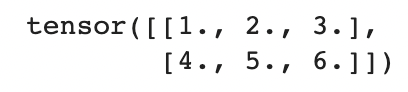



In [ ]:
b.view(3, 2)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

**Note:** `torch.view()` creates a new tensor, one the old one remains unchanged

In [ ]:
b.view(-1)

tensor([1., 2., 3., 4., 5., 6.])

In [ ]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

* Change a tensor type:

In [ ]:
a = torch.FloatTensor([1.5, 3.2, -7])

In [ ]:
a.type_as(torch.IntTensor())

tensor([ 1,  3, -7], dtype=torch.int32)

In [ ]:
a.type_as(torch.ByteTensor())

tensor([  1,   3, 249], dtype=torch.uint8)

**Note:** `.type_as()` creates a new tensor, the old one remains unchanged

In [ ]:
a

tensor([ 1.5000,  3.2000, -7.0000])

* Indexing is just like in `NumPy`:

In [ ]:
a = torch.FloatTensor([[100, 20, 35], [15, 163, 534], [52, 90, 66]])
a

tensor([[100.,  20.,  35.],
        [ 15., 163., 534.],
        [ 52.,  90.,  66.]])

In [ ]:
a[0, 0]

tensor(100.)

In [ ]:
a[0][0]

tensor(100.)

In [ ]:
a[0:2, 0:2]

tensor([[100.,  20.],
        [ 15., 163.]])

**Ariphmetics and boolean operations** and their analogues:  

| Оператор | Аналог |
|:-:|:-:|
|`+`| `torch.add()` |
|`-`| `torch.sub()` |
|`*`| `torch.mul()` |
|`/`| `torch.div()` |

* Addition:

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [ ]:
a + b

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [ ]:
a.add(b)

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [ ]:
b = -a
b

tensor([[  -1.,   -2.,   -3.],
        [ -10.,  -20.,  -30.],
        [-100., -200., -300.]])

In [ ]:
a + b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

* Subtraction:

In [ ]:
a - b

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

In [ ]:
a.sub(b)

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

* Multiplication (elementwise):

In [ ]:
a * b

tensor([[    -1.,     -4.,     -9.],
        [  -100.,   -400.,   -900.],
        [-10000., -40000., -90000.]])

In [ ]:
a.mul(b)

tensor([[    -1.,     -4.,     -9.],
        [  -100.,   -400.,   -900.],
        [-10000., -40000., -90000.]])

* Division (elementwise):

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [ ]:
a / b

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

Лучше:

In [ ]:
a.div(b)

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

**Note:** all this operations create new tensors, the old tensors remain unchanged

In [ ]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [ ]:
b

tensor([[ -1.,  -2.,  -3.],
        [-10., -20., -30.],
        [100., 200., 300.]])

* Comparison operators:

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [ ]:
a == b

tensor([[0, 0, 0],
        [0, 0, 0],
        [1, 1, 1]], dtype=torch.uint8)

In [ ]:
a != b

tensor([[1, 1, 1],
        [1, 1, 1],
        [0, 0, 0]], dtype=torch.uint8)

In [ ]:
a < b

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.uint8)

In [ ]:
a > b

tensor([[1, 1, 1],
        [1, 1, 1],
        [0, 0, 0]], dtype=torch.uint8)

* Using boolean mask indexing:

In [ ]:
a[a > b]

tensor([ 1.,  2.,  3., 10., 20., 30.])

In [ ]:
b[a == b]

tensor([100., 200., 300.])

Elementwise application of the **universal functions**:

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])

In [ ]:
a.sin()

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [ ]:
torch.sin(a)

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [ ]:
a.cos()

tensor([[ 0.5403, -0.4161, -0.9900],
        [-0.8391,  0.4081,  0.1543],
        [ 0.8623,  0.4872, -0.0221]])

In [ ]:
a.exp()

tensor([[2.7183e+00, 7.3891e+00, 2.0086e+01],
        [2.2026e+04, 4.8517e+08, 1.0686e+13],
        [       inf,        inf,        inf]])

In [ ]:
a.log()

tensor([[0.0000, 0.6931, 1.0986],
        [2.3026, 2.9957, 3.4012],
        [4.6052, 5.2983, 5.7038]])

In [ ]:
b = -a
b

tensor([[  -1.,   -2.,   -3.],
        [ -10.,  -20.,  -30.],
        [-100., -200., -300.]])

In [ ]:
b.abs()

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

* The sum, mean, max, min:

In [ ]:
a.sum()

tensor(666.)

In [ ]:
a.mean()

tensor(74.)

Along axis:

In [ ]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [ ]:
a.sum(0)

tensor([111., 222., 333.])

In [ ]:
a.sum(1)

tensor([  6.,  60., 600.])

In [ ]:
a.max()

tensor(300.)

In [ ]:
a.max(0)

(tensor([100., 200., 300.]), tensor([2, 2, 2]))

In [ ]:
a.min()

tensor(1.)

In [ ]:
a.min(0)

(tensor([1., 2., 3.]), tensor([0, 0, 0]))

**Note:** the second tensor returned by `.max()` and `.min()` contains the indices of max/min elements along this axis. E.g. in that case `a.min()` returned `(1, 2, 3)` which are the minimum elements along 0 axis (along columns) and their indices along 0 axis are `(0, 0, 0)`.

**Matrix operations**:

* Transpose a tensor:

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [ ]:
a.t()

tensor([[  1.,  10., 100.],
        [  2.,  20., 200.],
        [  3.,  30., 300.]])

It is not not the inplace operation too:

In [ ]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

* Dot product of vectors:

In [ ]:
a = torch.FloatTensor([1, 2, 3, 4, 5, 6])
b = torch.FloatTensor([-1, -2, -4, -6, -8, -10])

In [ ]:
a.dot(b)

tensor(-141.)

In [ ]:
a @ b

tensor(-141.)

In [ ]:
type(a)

torch.Tensor

In [ ]:
type(b)

torch.Tensor

In [ ]:
type(a @ b)

torch.Tensor

* Matrix product:

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [ ]:
a.mm(b)

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

In [ ]:
a @ b

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

Remain unchanged:

In [ ]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [ ]:
b

tensor([[ -1.,  -2.,  -3.],
        [-10., -20., -30.],
        [100., 200., 300.]])

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1], [-10], [100]])

In [ ]:
print(a.shape, b.shape)

torch.Size([3, 3]) torch.Size([3, 1])


In [ ]:
a @ b

tensor([[  279.],
        [ 2790.],
        [27900.]])

If we unroll the tensor `b` in an array (`torch.view(-1)`) the multiplication would be like with the column:

In [ ]:
b

tensor([[ -1.],
        [-10.],
        [100.]])

In [ ]:
b.view(-1)

tensor([ -1., -10., 100.])

In [ ]:
a @ b.view(-1)

tensor([  279.,  2790., 27900.])

In [ ]:
a.mv(b.view(-1))

tensor([  279.,  2790., 27900.])

**From NumPu to PyTorch conversion**:

In [ ]:
import numpy as np

a = np.random.rand(3, 3)
a

array([[0.34519832, 0.04236831, 0.57928844],
       [0.6905661 , 0.57932408, 0.20164703],
       [0.13019621, 0.68795847, 0.90742991]])

In [ ]:
b = torch.from_numpy(a)
b

tensor([[0.3452, 0.0424, 0.5793],
        [0.6906, 0.5793, 0.2016],
        [0.1302, 0.6880, 0.9074]], dtype=torch.float64)

**NOTE!** `a` and `b` have the same data storage, so the changes in one tensor will lead to the changes in another:

In [ ]:
b -= b
b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [ ]:
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

**From PyTorch to NumPy conversion:**

In [ ]:
a = torch.FloatTensor(2, 3, 4)
a

tensor([[[-2.0183e+20,  9.6549e-43,  8.9683e-44,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  2.6368e-09,  6.6649e-10]],

        [[ 8.3742e-10,  1.6985e+22,  1.6617e+22,  1.7248e-07],
         [ 5.3480e+22,  3.2501e+21,  1.6614e-07,  4.3960e-05],
         [ 6.6283e-10,  2.7200e+23,  2.6688e-09,  5.2439e-08]]])

In [ ]:
type(a)

torch.Tensor

In [ ]:
x = a.numpy()
x

array([[[-2.0182896e+20,  9.6549464e-43,  8.9683102e-44,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  2.6367610e-09,  6.6649175e-10]],

       [[ 8.3742002e-10,  1.6985472e+22,  1.6616884e+22,  1.7248090e-07],
        [ 5.3479665e+22,  3.2501012e+21,  1.6613997e-07,  4.3959721e-05],
        [ 6.6282829e-10,  2.7199904e+23,  2.6687641e-09,  5.2438931e-08]]],
      dtype=float32)

In [ ]:
x.shape

(2, 3, 4)

In [ ]:
type(x)

numpy.ndarray

Let's write the `forward_pass(X, w)` ($w_0$ is a part of the $w$) for a single neuron (activation = sigmoid) using PyTorch:

In [ ]:
def forward_pass(X, w):
    return torch.sigmoid(X @ w)

In [ ]:
X = torch.FloatTensor([[-5, 5], [2, 3], [1, -1]])
w = torch.FloatTensor([[-0.5], [2.5]])
result = forward_pass(X, w)
print('result: {}'.format(result))

result: tensor([[1.0000],
        [0.9985],
        [0.0474]])


<h3 style="text-align: center;"><a href="https://ru.wikipedia.org/wiki/CUDA">CUDA</a></h3>

[CUDA documentation](https://docs.nvidia.com/cuda/)

We can use both CPU (Central Processing Unit) and GPU (Graphical Processing Unit) to make the computations with PyTorch. We can switch between them easily, this is one of the most important things in PyTorch framework.

In [ ]:
x = torch.FloatTensor(1024, 1024).uniform_()
x

tensor([[0.5014, 0.8881, 0.7444,  ..., 0.5334, 0.9433, 0.1463],
        [0.6501, 0.3321, 0.5408,  ..., 0.1567, 0.1845, 0.2583],
        [0.1461, 0.8356, 0.4672,  ..., 0.0601, 0.2228, 0.4179],
        ...,
        [0.0636, 0.6334, 0.2438,  ..., 0.8984, 0.7754, 0.0656],
        [0.7069, 0.9595, 0.7826,  ..., 0.4149, 0.9736, 0.4854],
        [0.5677, 0.6183, 0.1889,  ..., 0.0494, 0.0806, 0.6742]])

In [ ]:
x.is_cuda

False

Place a tensor on GPU:

In [ ]:
x = x.cuda()

In [ ]:
x.is_cuda

True

In [ ]:
x

Let's multiply two tensors on GPU and then move the result on the CPU:

In [ ]:
a = torch.FloatTensor(10000, 10000).uniform_()
b = torch.FloatTensor(10000, 10000).uniform_()
c = a.cuda().mul(b.cuda()).cpu()

In [ ]:
c

In [ ]:
a

tensor([[0.5724, 0.8463, 0.4107,  ..., 0.7273, 0.2798, 0.4015],
        [0.9141, 0.2181, 0.4628,  ..., 0.4209, 0.7936, 0.9492],
        [0.9088, 0.8321, 0.0150,  ..., 0.7916, 0.7781, 0.8836],
        ...,
        [0.1261, 0.6659, 0.0699,  ..., 0.9778, 0.3513, 0.0458],
        [0.4079, 0.5140, 0.4856,  ..., 0.9339, 0.3075, 0.2588],
        [0.7020, 0.0596, 0.7305,  ..., 0.3154, 0.0388, 0.1946]])

Tensors placed on CPU and tensors placed on GPU are unavailable for each other:

In [ ]:
a = torch.FloatTensor(10000, 10000).uniform_().cpu()
b = torch.FloatTensor(10000, 10000).uniform_().cuda()

In [ ]:
a + b

RuntimeError: Expected object of type torch.FloatTensor but found type torch.cuda.FloatTensor for argument #3 'other'

Example of working with GPU:

In [ ]:
x = torch.FloatTensor(5, 5, 5).uniform_()

# check for CUDA availability (NVIDIA GPU)
if torch.cuda.is_available():
    # get the CUDA device name
    device = torch.device('cuda')          # CUDA-device object
    y = torch.ones_like(x, device=device)  # create a tensor on GPU
    x = x.to(device)                       # or just `.to("cuda")`
    z = x + y
    print(z)
    # you can set the type while `.to` operation
    print(z.to("cpu", torch.double))

tensor([[[1.9693, 1.1198, 1.0172, 1.2034, 1.2875],
         [1.4131, 1.3164, 1.9345, 1.9337, 1.9572],
         [1.7345, 1.2186, 1.9105, 1.6177, 1.1420],
         [1.6490, 1.1597, 1.5847, 1.6580, 1.8715],
         [1.0228, 1.0453, 1.0512, 1.1437, 1.1437]],

        [[1.7028, 1.4623, 1.1701, 1.0893, 1.0764],
         [1.2116, 1.5412, 1.0967, 1.8721, 1.9107],
         [1.1340, 1.1484, 1.4099, 1.4459, 1.7837],
         [1.3865, 1.0431, 1.3485, 1.6199, 1.0908],
         [1.4057, 1.8685, 1.2232, 1.4738, 1.3243]],

        [[1.2735, 1.7283, 1.4247, 1.9058, 1.8978],
         [1.2789, 1.7611, 1.8657, 1.1219, 1.0049],
         [1.2962, 1.6973, 1.7559, 1.2467, 1.7554],
         [1.9915, 1.2676, 1.8824, 1.6168, 1.6185],
         [1.8360, 1.0345, 1.2038, 1.7657, 1.8525]],

        [[1.5283, 1.6573, 1.5225, 1.4269, 1.2714],
         [1.0401, 1.5209, 1.4956, 1.9208, 1.8503],
         [1.2160, 1.6476, 1.2769, 1.7877, 1.7272],
         [1.3110, 1.1294, 1.3310, 1.3048, 1.4476],
         [1.2117, 1.9958,

<h3 style="text-align: center;">Autograd<b></b></h3>

The autograd package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

Importing the `Variable()` class:

In [ ]:
from torch.autograd import Variable

Now we will convert `torch.Tensor()` into `torch.Variable()` and we will get just the same tensor but the possibility to calculate the gradients with respect to this tensor.

If `а` is a tensor wrapped into `Variable()`, then `a.backward()` calculates the gradients with respect to all the tensors on which the tensor `a` depends.

**Note:** If you use `pytorch 0.4.0` version (or newer), then `torch.Tensor` and `torch.Variable()` were merged into `torch.Tensor`, so one doesn't need to use `Variable()` any more. (`torch.Variable()` is deprecated).

The examples:

In [ ]:
x = torch.FloatTensor(3, 1).uniform_()
y = torch.FloatTensor(3, 1).uniform_()
w = torch.FloatTensor(3, 3).uniform_() 
b = torch.FloatTensor(3, 1).uniform_()

x = Variable(x, requires_grad=True)
y = Variable(x, requires_grad=False)
w = Variable(w, requires_grad=True)
b = Variable(b, requires_grad=True)

y_pred = (w @ x).add_(b)

loss = (y_pred - y).sum()

# calculate the gradients
loss.backward()

In [ ]:
x.grad

tensor([[1.0422],
        [1.1374],
        [1.0037]])

In [ ]:
w.grad

tensor([[0.0262, 0.8391, 0.0517],
        [0.0262, 0.8391, 0.0517],
        [0.0262, 0.8391, 0.0517]])

In [ ]:
b.grad

tensor([[1.],
        [1.],
        [1.]])

In [ ]:
y.grad

In [ ]:
loss.grad

**NOTE:** the gradients are placed into the `.grad` field of tensors (variables) on which gradients were calculated. Gradients *are not placed* in the variable `loss` here!

Here is how to get `torch.Tensor()` from the `Variable()` (`.data` field):

In [ ]:
x

tensor([[0.0262],
        [0.8391],
        [0.0517]], requires_grad=True)

In [ ]:
x.data

tensor([[0.0262],
        [0.8391],
        [0.0517]])

<h3 style="text-align: center;">Further reading:<b></b></h3>

*1). Official PyTorch tutorials: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py*

*2). arXiv article about the deep learning frameworks comparison: https://arxiv.org/pdf/1511.06435.pdf*

*3). Useful repo with different tutorials: https://github.com/yunjey/pytorch-tutorial*

*4). Facebook AI Research (main contributor of PyTorch) website: https://facebook.ai/developers/tools*